# DSI Analysis

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
#import data
data = pd.ExcelFile('DSI Interview Exercise - Oct 2022 (viz candidate).xlsx')
#import sheets
model_table = pd.read_excel(data, 'model_table')
data_dic = pd.read_excel(data, 'Data Dictionary')
fact_txn = pd.read_excel(data, 'fact_txn')
dim_patient = pd.read_excel(data, 'dim_patient')
dim_physician = pd.read_excel(data, 'dim_physician')

### 1. Review tables

In [3]:
model_table.head()

Column Name Data Type  \
0      PATIENT_ID    NUMBER   
1          TARGET    NUMBER   
2     DISEASEX_DT      DATE   
3     PATIENT_AGE    NUMBER   
4  PATIENT_GENDER    STRING   

                                       Values/Format  \
0                                                NaN   
1  1: Patient received Drug A\n0: Patient did not...   
2                                         YYYY-MM-DD   
3                                                NaN   
4                                   M-Male\nF-Female   

                                        Descriptions  
0                 Unique identifier for each patient  
1  Drug A indicator, used as target variable for ...  
2          Date patient was diagnosed with Disease X  
3       Age of patient when diagnosed with Disease X  
4                                   Patient's Gender

In [4]:
data_dic.head()

Unnamed: 0  Unnamed: 1    Unnamed: 2 Unnamed: 3     Unnamed: 4  \
0         NaN         NaN           NaN        NaN            NaN   
1         NaN  Table Name   Column Name  Data Type  Values/Format   
2         NaN    fact_txn        TXN_DT       DATE     YYYY-MM-DD   
3         NaN    fact_txn    PATIENT_ID     NUMBER            NaN   
4         NaN    fact_txn  PHYSICIAN_ID     NUMBER            NaN   

                                          Unnamed: 5  
0                                                NaN  
1                                       Descriptions  
2                        The date of the transaction  
3  Unique identifier for each patient (use to joi...  
4  Unique identifier for each physician associate...

In [5]:
fact_txn.head()

TXN_DT  PATIENT_ID  PHYSICIAN_ID       TXN_LOCATION_TYPE  \
0  2021-12-27        3124           NaN  INDEPENDENT LABORATORY   
1  2020-02-25        3352       21972.0                  OFFICE   
2  2022-01-25        2902       21586.0     HOSPITAL OUTPATIENT   
3  2022-03-05        2943        2439.0              UNASSIGNED   
4  2018-01-03        3589        6381.0                  OFFICE   

  INSURANCE_TYPE    TXN_TYPE           TXN_DESC  
0     COMMERCIAL    SYMPTOMS  ACUTE_PHARYNGITIS  
1     COMMERCIAL  CONDITIONS            obesity  
2       MEDICARE  CONDITIONS  immunocompromised  
3     COMMERCIAL  CONDITIONS           diabetes  
4       MEDICARE    SYMPTOMS              COUGH

In [6]:
dim_patient.head()

PATIENT_ID  BIRTH_YEAR GENDER
0           1        1988      M
1           2        2020      M
2           3        1973      M
3           4        2022      M
4           5        1988      M

In [7]:
dim_physician.head()

PHYSICIAN_ID STATE       PHYSICIAN_TYPE GENDER  BIRTH_YEAR
0             1    TX     PHYSICAL THERAPY    NaN         NaN
1             2    IN  PHYSICIAN ASSISTANT    NaN         NaN
2             3    CA   EMERGENCY MEDICINE    NaN         NaN
3             4    TX   NURSE PRACTITIONER    NaN         NaN
4             5    WA   EMERGENCY MEDICINE    NaN         NaN

In [8]:
#remove 2 first empty rows and first col of data_dic 

data_dic.rename(columns=data_dic.iloc[1], inplace = True)
data_dic = data_dic.iloc[2:, 1:]
data_dic

Table Name        Column Name Data Type  \
2        fact_txn             TXN_DT      DATE   
3        fact_txn         PATIENT_ID    NUMBER   
4        fact_txn       PHYSICIAN_ID    NUMBER   
5        fact_txn  TXN_LOCATION_TYPE    STRING   
6        fact_txn     INSURANCE_TYPE    STRING   
7        fact_txn           TXN_TYPE    STRING   
8        fact_txn           TXN_DESC    STRING   
9     dim_patient         PATIENT_ID    NUMBER   
10    dim_patient         BIRTH_YEAR    NUMBER   
11    dim_patient             GENDER    STRING   
12  dim_physician       PHYSICIAN_ID    NUMBER   
13  dim_physician              STATE    STRING   
14  dim_physician     PHYSICIAN_TYPE    STRING   
15  dim_physician             GENDER    STRING   
16  dim_physician         BIRTH_YEAR    NUMBER   

                                        Values/Format  \
2                                          YYYY-MM-DD   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7   CONDITIONS\nSYMPTOMS\nCONTRAINDICATIONS\nTREAT...   
8                                                 NaN   
9                                                 NaN   
10                                               YYYY   
11                        M-Male\nF-Female\nU-Unknown   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                   M-Male\nF-Female   
16                                               YYYY   

                                         Descriptions  
2                         The date of the transaction  
3   Unique identifier for each patient (use to joi...  
4   Unique identifier for each physician associate...  
5         Type of location where transaction occurred  
6   Payment type classification as COMMERCIAL, MED...  
7   Identifies type of information identified duri...  
8       Short description of the recorded transaction  
9   Unique identifier for each patient (use to joi...  
10                           Patient's year of birth.  
11                                   Patient's Gender  
12  Unique identifier for each physician associate...  
13                    Physician's primary state code.  
14            Physician primary specialty description  
15                                 Physician's Gender  
16                         Physician's year of birth.

In [9]:
fact_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115274 entries, 0 to 115273
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TXN_DT             115274 non-null  object 
 1   PATIENT_ID         115274 non-null  int64  
 2   PHYSICIAN_ID       105555 non-null  float64
 3   TXN_LOCATION_TYPE  99479 non-null   object 
 4   INSURANCE_TYPE     115274 non-null  object 
 5   TXN_TYPE           115274 non-null  object 
 6   TXN_DESC           115274 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.2+ MB


In [10]:
#notes: physician_id and txn_location_type have null values, some datatypes shall be changed

In [11]:
dim_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PATIENT_ID  4020 non-null   int64 
 1   BIRTH_YEAR  4020 non-null   int64 
 2   GENDER      4020 non-null   object
dtypes: int64(2), object(1)
memory usage: 94.3+ KB


In [12]:
# non null values, datatypes changes 

In [13]:
dim_physician.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25343 entries, 0 to 25342
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PHYSICIAN_ID    25343 non-null  int64  
 1   STATE           25341 non-null  object 
 2   PHYSICIAN_TYPE  25343 non-null  object 
 3   GENDER          24137 non-null  object 
 4   BIRTH_YEAR      21039 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 990.1+ KB


In [14]:
#gender and birth_year have some null values, datatypes changes

### 2. Data cleaning and preparation

In [15]:
#prepare fact_txn table 
#change datatypes

#datetime
fact_txn['TXN_DT'] = pd.to_datetime(fact_txn['TXN_DT'], format = '%Y/%m/%d')

#categories
fact_txn['TXN_LOCATION_TYPE'] = fact_txn['TXN_LOCATION_TYPE'].astype('category')
fact_txn['INSURANCE_TYPE'] = fact_txn['INSURANCE_TYPE'].astype('category')
fact_txn['TXN_TYPE'] = fact_txn['TXN_TYPE'].astype('category')
fact_txn['TXN_DESC'] = fact_txn['TXN_DESC'].astype('category')

#numbers/int
#errors='coerce' invalid values will be set as NaN, Int64 will convert NaN to NA pandas
fact_txn['PATIENT_ID'] = pd.to_numeric(fact_txn['PATIENT_ID'], downcast='signed', errors='coerce').astype('Int64')
fact_txn['PHYSICIAN_ID'] = pd.to_numeric(fact_txn['PHYSICIAN_ID'], downcast='signed', errors='coerce').astype('Int64')

#check
fact_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115274 entries, 0 to 115273
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   TXN_DT             115274 non-null  datetime64[ns]
 1   PATIENT_ID         115274 non-null  Int64         
 2   PHYSICIAN_ID       105555 non-null  Int64         
 3   TXN_LOCATION_TYPE  99479 non-null   category      
 4   INSURANCE_TYPE     115274 non-null  category      
 5   TXN_TYPE           115274 non-null  category      
 6   TXN_DESC           115274 non-null  category      
dtypes: Int64(2), category(4), datetime64[ns](1)
memory usage: 3.3 MB


In [16]:
#apply upper case to TXN_DESC column to avoid missmatches 
fact_txn['TXN_DESC'] = fact_txn ['TXN_DESC'].str.upper()

In [17]:
#prepare dim_patient table
#change datatypes

#categories
dim_patient['GENDER'] = dim_patient['GENDER'].astype('category')


#check
dim_patient.info()
dim_patient.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PATIENT_ID  4020 non-null   int64   
 1   BIRTH_YEAR  4020 non-null   int64   
 2   GENDER      4020 non-null   category
dtypes: category(1), int64(2)
memory usage: 67.0 KB


PATIENT_ID  BIRTH_YEAR GENDER
0           1        1988      M
1           2        2020      M
2           3        1973      M
3           4        2022      M
4           5        1988      M

In [18]:
#prepare dim_physician table 
#change datatypes

#categories
dim_physician['STATE'] = dim_physician['STATE'].astype('category')
dim_physician['PHYSICIAN_TYPE'] = dim_physician['PHYSICIAN_TYPE'].astype('category')
dim_physician['GENDER'] = dim_physician['GENDER'].astype('category')

#number / int64
dim_physician['BIRTH_YEAR'] = pd.to_numeric(dim_physician['BIRTH_YEAR'], downcast='signed', errors='coerce').astype('Int64')
dim_physician['PHYSICIAN_ID'] = pd.to_numeric(dim_physician['PHYSICIAN_ID'], downcast='signed', errors='coerce').astype('Int64')

#check
dim_physician.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25343 entries, 0 to 25342
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PHYSICIAN_ID    25343 non-null  Int64   
 1   STATE           25341 non-null  category
 2   PHYSICIAN_TYPE  25343 non-null  category
 3   GENDER          24137 non-null  category
 4   BIRTH_YEAR      21039 non-null  Int64   
dtypes: Int64(2), category(3)
memory usage: 556.9 KB


### 3. Calculated extra fields

In [19]:
#calculate current age (aprox.) of the patient as a new column
dim_patient['BIRTH_DATE'] = pd.to_datetime(dim_patient['BIRTH_YEAR'], format = '%Y')
dim_patient.head()
dim_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   PATIENT_ID  4020 non-null   int64         
 1   BIRTH_YEAR  4020 non-null   int64         
 2   GENDER      4020 non-null   category      
 3   BIRTH_DATE  4020 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 98.4 KB


In [20]:
from datetime import date
def calculate_age(birth):
    today = date.today()
    return today.year - birth.year - ((today.month, today.day) < (birth.month, birth.day))

In [21]:
dim_patient['PATIENT_AGE'] = dim_patient['BIRTH_DATE'].apply(calculate_age)
dim_patient.head()

PATIENT_ID  BIRTH_YEAR GENDER BIRTH_DATE  PATIENT_AGE
0           1        1988      M 1988-01-01           34
1           2        2020      M 2020-01-01            2
2           3        1973      M 1973-01-01           49
3           4        2022      M 2022-01-01            0
4           5        1988      M 1988-01-01           34

In [22]:
#format PATIENT_GENDER as expected
def patient_gender(value):
    if value == 'M':
        return 'M-Male'
    elif value == 'F':
        return 'F-Female'
    else:
        return 'U-Unknown'

In [23]:
dim_patient['PATIENT_GENDER'] = dim_patient['GENDER'].map(patient_gender)
dim_patient.head(10)

PATIENT_ID  BIRTH_YEAR GENDER BIRTH_DATE  PATIENT_AGE PATIENT_GENDER
0           1        1988      M 1988-01-01           34         M-Male
1           2        2020      M 2020-01-01            2         M-Male
2           3        1973      M 1973-01-01           49         M-Male
3           4        2022      M 2022-01-01            0         M-Male
4           5        1988      M 1988-01-01           34         M-Male
5           6        1951      M 1951-01-01           71         M-Male
6           7        2021      M 2021-01-01            1         M-Male
7           8        1977      M 1977-01-01           45         M-Male
8           9        1991      M 1991-01-01           31         M-Male
9          10        1948      F 1948-01-01           74       F-Female

In [24]:
#get state name from abbreviation from dim_physician
import us 
state_dict = us.states.mapping('abbr', 'name')
dim_physician['STATE_NAME'] = dim_physician['STATE'].map(state_dict)
dim_physician['STATE_NAME'] = dim_physician['STATE_NAME'].astype('category')
dim_physician.head()

PHYSICIAN_ID STATE       PHYSICIAN_TYPE GENDER  BIRTH_YEAR  STATE_NAME
0             1    TX     PHYSICAL THERAPY    NaN        <NA>       Texas
1             2    IN  PHYSICIAN ASSISTANT    NaN        <NA>     Indiana
2             3    CA   EMERGENCY MEDICINE    NaN        <NA>  California
3             4    TX   NURSE PRACTITIONER    NaN        <NA>       Texas
4             5    WA   EMERGENCY MEDICINE    NaN        <NA>  Washington

In [25]:
#calculate num conditions from fact_txn table

fact_txn_num_conditions = fact_txn.groupby('PATIENT_ID')['TXN_TYPE'].apply(lambda x: (x == 'CONDITIONS').sum()).reset_index(name='NUM_CONDITIONS')
print(fact_txn_num_conditions)

      PATIENT_ID  NUM_CONDITIONS
0              1               1
1              2               1
2              3               1
3              4               1
4              5               1
...          ...             ...
4015        4016              71
4016        4017              64
4017        4018              68
4018        4019              15
4019        4020              29

[4020 rows x 2 columns]


In [26]:
#testing
display(fact_txn_num_conditions[fact_txn_num_conditions['PATIENT_ID'] == 4017])

PATIENT_ID  NUM_CONDITIONS
4016        4017              64

In [27]:
display(fact_txn_num_conditions[fact_txn_num_conditions['PATIENT_ID'] == 3476])

PATIENT_ID  NUM_CONDITIONS
3475        3476               9

In [28]:
#calculate num contraindications from fact_txn table

fact_txn_num_contraindications = fact_txn.groupby('PATIENT_ID')['TXN_TYPE'].apply(lambda x: (x == 'CONTRAINDICATIONS').sum()).reset_index(name='NUM_CONTRAINDICATIONS')
fact_txn_num_contraindications

PATIENT_ID  NUM_CONTRAINDICATIONS
0              1                      0
1              2                      0
2              3                      0
3              4                      0
4              5                      0
...          ...                    ...
4015        4016                      6
4016        4017                     54
4017        4018                     37
4018        4019                     39
4019        4020                      1

[4020 rows x 2 columns]

In [29]:
#calculate num symptoms from fact_txn table

fact_txn_num_symptoms = fact_txn.groupby('PATIENT_ID')['TXN_TYPE'].apply(lambda x: (x == 'SYMPTOMS').sum()).reset_index(name='NUM_SYMPTOMS')
print(fact_txn_num_symptoms)

      PATIENT_ID  NUM_SYMPTOMS
0              1             0
1              2             1
2              3             0
3              4             0
4              5             0
...          ...           ...
4015        4016            36
4016        4017            46
4017        4018             8
4018        4019            46
4019        4020             4

[4020 rows x 2 columns]


In [30]:
#calculate target (Drug A patients)
fact_txn_treatment= fact_txn.groupby('PATIENT_ID')['TXN_DESC'].apply(lambda x: (x == 'DRUG A').sum()).reset_index(name='DRUGA_COUNT')
fact_txn_treatment.head(100)

PATIENT_ID  DRUGA_COUNT
0            1            0
1            2            0
2            3            0
3            4            0
4            5            0
..         ...          ...
95          96            0
96          97            0
97          98            0
98          99            0
99         100            0

[100 rows x 2 columns]

In [31]:
display(fact_txn_treatment[fact_txn_treatment['PATIENT_ID'] == 4010])

PATIENT_ID  DRUGA_COUNT
4009        4010            1

In [32]:
#Patients that were treated with drug A more than once
fact_txn_treatment.loc[fact_txn_treatment['DRUGA_COUNT'] > 1]

PATIENT_ID  DRUGA_COUNT
700          701            2
1584        1585            2
2004        2005            2
2046        2047            2
2686        2687            2
3919        3920            2
3990        3991            2

In [33]:
#now create the boolean (1,0) target column
fact_txn_treatment['TARGET'] = np.where(fact_txn_treatment['DRUGA_COUNT'] >= 1, 1, 0)
fact_txn_treatment.head()

PATIENT_ID  DRUGA_COUNT  TARGET
0           1            0       0
1           2            0       0
2           3            0       0
3           4            0       0
4           5            0       0

In [34]:
display(fact_txn_treatment[fact_txn_treatment['PATIENT_ID'] == 701])

PATIENT_ID  DRUGA_COUNT  TARGET
700         701            2       1

In [35]:
#Patients with prescribed with drug a more than once 
fact_txn_treatment.loc[fact_txn_treatment['DRUGA_COUNT'] > 1]

PATIENT_ID  DRUGA_COUNT  TARGET
700          701            2       1
1584        1585            2       1
2004        2005            2       1
2046        2047            2       1
2686        2687            2       1
3919        3920            2       1
3990        3991            2       1

In [36]:
#disease x diagnosis fact_txn

#create a df grouped by patient ID that counts how many time a patient has been diagnosed with disease x
fact_txn_disease_x = fact_txn.groupby('PATIENT_ID')['TXN_DESC'].apply(lambda x: (x == 'DISEASE_X').sum()).reset_index(name='DISEASEX_COUNT')
print(fact_txn_disease_x)

      PATIENT_ID  DISEASEX_COUNT
0              1               1
1              2               1
2              3               1
3              4               1
4              5               1
...          ...             ...
4015        4016               1
4016        4017               3
4017        4018               1
4018        4019               3
4019        4020               1

[4020 rows x 2 columns]


In [37]:
fact_txn_disease_x[fact_txn_disease_x['PATIENT_ID'] == 401]

PATIENT_ID  DISEASEX_COUNT
400         401              22

In [38]:
#Patients diagnosed with disease x more than once
fact_txn_disease_x.loc[fact_txn_disease_x['DISEASEX_COUNT'] > 1]

PATIENT_ID  DISEASEX_COUNT
8              9               2
10            11               2
13            14               2
20            21               2
33            34               9
...          ...             ...
3995        3996               2
4006        4007               2
4010        4011               3
4016        4017               3
4018        4019               3

[1100 rows x 2 columns]

In [39]:
#features from first time disease x was diagnosed need to be extracted 

#sort values by date
fact_txn_disease_x_features = fact_txn.sort_values(by='TXN_DT',ascending=True)

#filter by txn_desc == disease x
fact_txn_disease_x_features = fact_txn_disease_x_features[fact_txn_disease_x_features['TXN_DESC'] == 'DISEASE_X']
fact_txn_disease_x_features

TXN_DT  PATIENT_ID  PHYSICIAN_ID       TXN_LOCATION_TYPE  \
9199   2022-04-01         683         16981              UNASSIGNED   
105575 2022-04-03        1176          <NA>  INDEPENDENT LABORATORY   
87097  2022-04-08        2295          <NA>  OTHER PLACE OF SERVICE   
94077  2022-04-08        2509          <NA>  OTHER PLACE OF SERVICE   
65429  2022-04-09        3208         18291    URGENT CARE FACILITY   
...           ...         ...           ...                     ...   
40241  2022-07-22        3604         14536                  OFFICE   
60809  2022-07-22        1019         15987      INPATIENT HOSPITAL   
73663  2022-07-22        1590         20531              UNASSIGNED   
105428 2022-07-22          85         16215      INPATIENT HOSPITAL   
22950  2022-07-22        3718          <NA>  OTHER PLACE OF SERVICE   

       INSURANCE_TYPE    TXN_TYPE   TXN_DESC  
9199         MEDICAID  CONDITIONS  DISEASE_X  
105575     COMMERCIAL  CONDITIONS  DISEASE_X  
87097      COMMERCIAL  CONDITIONS  DISEASE_X  
94077      COMMERCIAL  CONDITIONS  DISEASE_X  
65429        MEDICARE  CONDITIONS  DISEASE_X  
...               ...         ...        ...  
40241      COMMERCIAL  CONDITIONS  DISEASE_X  
60809      COMMERCIAL  CONDITIONS  DISEASE_X  
73663      COMMERCIAL  CONDITIONS  DISEASE_X  
105428       MEDICARE  CONDITIONS  DISEASE_X  
22950      COMMERCIAL  CONDITIONS  DISEASE_X  

[6900 rows x 7 columns]

In [40]:
#Create a rank (cumulative sum) of disease x diagnosis per patient, as it is sorted by date rank == 1 shall be the first diagnosis for each patient
fact_txn_disease_x_features['RANK'] = fact_txn_disease_x_features.groupby('PATIENT_ID').cumcount() + 1
fact_txn_disease_x_features.head(30)

TXN_DT  PATIENT_ID  PHYSICIAN_ID  \
9199   2022-04-01         683         16981   
105575 2022-04-03        1176          <NA>   
87097  2022-04-08        2295          <NA>   
94077  2022-04-08        2509          <NA>   
65429  2022-04-09        3208         18291   
10639  2022-04-10        3208          <NA>   
29216  2022-04-11        3208         15000   
45121  2022-04-11        3208          1976   
95936  2022-04-11         189          <NA>   
46362  2022-04-12         401           678   
68386  2022-04-12         401           678   
1211   2022-04-13        1585         14889   
98850  2022-04-13        1585         14889   
16653  2022-04-13         401           678   
54060  2022-04-14         401           678   
65644  2022-04-14        3095         23024   
20994  2022-04-14        3095          5663   
4499   2022-04-14        3208         15000   
44664  2022-04-16         372         10840   
18480  2022-04-16         372          8484   
96407  2022-04-18        2785         18891   
29869  2022-04-19        3095          5663   
107325 2022-04-19        3095         14548   
64994  2022-04-20        3208         21136   
112670 2022-04-20        3208         21136   
66868  2022-04-20         401          5149   
21033  2022-04-21        2029          <NA>   
5100   2022-04-21        1127         13251   
80218  2022-04-21        1090          6855   
57301  2022-04-22        1034          4447   

                                     TXN_LOCATION_TYPE INSURANCE_TYPE  \
9199                                        UNASSIGNED       MEDICAID   
105575                          INDEPENDENT LABORATORY     COMMERCIAL   
87097                           OTHER PLACE OF SERVICE     COMMERCIAL   
94077                           OTHER PLACE OF SERVICE     COMMERCIAL   
65429                             URGENT CARE FACILITY       MEDICARE   
10639                           INDEPENDENT LABORATORY       MEDICARE   
29216                             URGENT CARE FACILITY       MEDICARE   
45121                             URGENT CARE FACILITY       MEDICARE   
95936                           OTHER PLACE OF SERVICE       MEDICARE   
46362   HOSPITAL INPATIENT (INCLUDING MEDICARE PART A)     COMMERCIAL   
68386                               INPATIENT HOSPITAL     COMMERCIAL   
1211                                            OFFICE     COMMERCIAL   
98850                              HOSPITAL OUTPATIENT     COMMERCIAL   
16653                               INPATIENT HOSPITAL     COMMERCIAL   
54060                               INPATIENT HOSPITAL     COMMERCIAL   
65644                                       UNASSIGNED     COMMERCIAL   
20994                                       UNASSIGNED     COMMERCIAL   
4499                              URGENT CARE FACILITY       MEDICARE   
44664                    ON CAMPUS-OUTPATIENT HOSPITAL     COMMERCIAL   
18480                        EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
96407                                           OFFICE     COMMERCIAL   
29869                                       UNASSIGNED     COMMERCIAL   
107325                                      UNASSIGNED     COMMERCIAL   
64994                              HOSPITAL OUTPATIENT       MEDICARE   
112670                   ON CAMPUS-OUTPATIENT HOSPITAL       MEDICARE   
66868                                       UNASSIGNED     COMMERCIAL   
21033                           INDEPENDENT LABORATORY     COMMERCIAL   
5100                         EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
80218                           OTHER PLACE OF SERVICE       MEDICAID   
57301                                           OFFICE     COMMERCIAL   

          TXN_TYPE   TXN_DESC  RANK  
9199    CONDITIONS  DISEASE_X     1  
105575  CONDITIONS  DISEASE_X     1  
87097   CONDITIONS  DISEASE_X     1  
94077   CONDITIONS  DISEASE_X     1  
65429   CONDITIONS  DISEASE_X     1  
10639   CONDITIONS  DISEASE_X     2  
29216   CONDITIONS  DIS

In [41]:
#sort the resulted data frame by patient ID to review 
fact_txn_disease_x_features = fact_txn_disease_x_features.sort_values(by='PATIENT_ID',ascending=True)
fact_txn_disease_x_features.head(30)

TXN_DT  PATIENT_ID  PHYSICIAN_ID          TXN_LOCATION_TYPE  \
91556  2022-06-11           1         24633  EMERGENCY ROOM - HOSPITAL   
79434  2022-06-22           2          7777  EMERGENCY ROOM - HOSPITAL   
75055  2022-06-20           3         17051                     OFFICE   
106308 2022-06-30           4         19478  EMERGENCY ROOM - HOSPITAL   
14791  2022-06-02           5          <NA>     INDEPENDENT LABORATORY   
94258  2022-06-17           6          <NA>     INDEPENDENT LABORATORY   
98973  2022-06-06           7          8189         INPATIENT HOSPITAL   
57943  2022-06-28           8         21499  EMERGENCY ROOM - HOSPITAL   
3418   2022-07-07           9          5281        HOSPITAL OUTPATIENT   
54937  2022-06-30           9           841        HOSPITAL OUTPATIENT   
105223 2022-06-01          10         12379  EMERGENCY ROOM - HOSPITAL   
69712  2022-06-23          11         22582  EMERGENCY ROOM - HOSPITAL   
110529 2022-06-23          11         11336        HOSPITAL OUTPATIENT   
79756  2022-06-22          12         10655  EMERGENCY ROOM - HOSPITAL   
100293 2022-06-28          13          2048                     OFFICE   
97447  2022-06-27          14         13657  EMERGENCY ROOM - HOSPITAL   
18534  2022-06-27          14          8414        HOSPITAL OUTPATIENT   
34944  2022-06-26          15          6385                 UNASSIGNED   
59173  2022-06-30          16         21804        HOSPITAL OUTPATIENT   
77857  2022-06-07          17         16590  EMERGENCY ROOM - HOSPITAL   
52890  2022-06-02          18          8471      CLINIC - FREESTANDING   
95297  2022-06-24          19          <NA>                     OFFICE   
1393   2022-06-28          20          <NA>       URGENT CARE FACILITY   
77315  2022-07-16          21          <NA>           AMBULANCE - LAND   
112759 2022-06-27          21          <NA>           AMBULANCE - LAND   
78081  2022-06-25          22           937                     OFFICE   
68149  2022-06-22          23          8022                     OFFICE   
108245 2022-06-19          24          1127                     OFFICE   
52138  2022-06-19          25          2909  EMERGENCY ROOM - HOSPITAL   
6426   2022-06-27          26          6693  EMERGENCY ROOM - HOSPITAL   

       INSURANCE_TYPE    TXN_TYPE   TXN_DESC  RANK  
91556      COMMERCIAL  CONDITIONS  DISEASE_X     1  
79434      COMMERCIAL  CONDITIONS  DISEASE_X     1  
75055      COMMERCIAL  CONDITIONS  DISEASE_X     1  
106308     COMMERCIAL  CONDITIONS  DISEASE_X     1  
14791      COMMERCIAL  CONDITIONS  DISEASE_X     1  
94258      COMMERCIAL  CONDITIONS  DISEASE_X     1  
98973      COMMERCIAL  CONDITIONS  DISEASE_X     1  
57943      COMMERCIAL  CONDITIONS  DISEASE_X     1  
3418       COMMERCIAL  CONDITIONS  DISEASE_X     2  
54937      COMMERCIAL  CONDITIONS  DISEASE_X     1  
105223     COMMERCIAL  CONDITIONS  DISEASE_X     1  
69712      COMMERCIAL  CONDITIONS  DISEASE_X     2  
110529       MEDICARE  CONDITIONS  DISEASE_X     1  
79756      COMMERCIAL  CONDITIONS  DISEASE_X     1  
100293     COMMERCIAL  CONDITIONS  DISEASE_X     1  
97447      COMMERCIAL  CONDITIONS  DISEASE_X     1  
18534      COMMERCIAL  CONDITIONS  DISEASE_X     2  
34944        MEDICARE  CONDITIONS  DISEASE_X     1  
59173     UNSPECIFIED  CONDITIONS  DISEASE_X     1  
77857        MEDICARE  CONDITIONS  DISEASE_X     1  
52890        MEDICAID  CONDITIONS  DISEASE_X     1  
95297      COMMERCIAL  CONDITIONS  DISEASE_X     1  
1393       COMMERCIAL  CONDITIONS  DISEASE_X     1  
77315      COMMERCIAL  CONDITIONS  DISEASE_X     2  
112759     COMMERCIAL  CONDITIONS  DISEASE_X     1  
78081      COMMERCIAL  CONDITIONS  DISEASE_X     1  
68149        MEDICARE  CONDITIONS  DISEASE_X     1  
108245     COMMERCIAL  CONDITIONS  DISEASE_X     1  
52138        MEDICARE  CONDITIONS  DISEASE_X     1  
6426       COMMERCIAL  CONDITIONS  DISEASE_X     1

In [42]:
diagnosed_patients_count = fact_txn_disease_x_features['PATIENT_ID'].nunique()
diagnosed_patients_count

4020

In [43]:
total_patients_count = fact_txn['PATIENT_ID'].nunique()
total_patients_count

4020

In [44]:
fact_txn_disease_x_features[fact_txn_disease_x_features['PATIENT_ID'] == 683]

TXN_DT  PATIENT_ID  PHYSICIAN_ID TXN_LOCATION_TYPE INSURANCE_TYPE  \
9199  2022-04-01         683         16981        UNASSIGNED       MEDICAID   
1832  2022-06-01         683         16981        UNASSIGNED       MEDICAID   
19723 2022-05-01         683         16981        UNASSIGNED       MEDICAID   

         TXN_TYPE   TXN_DESC  RANK  
9199   CONDITIONS  DISEASE_X     1  
1832   CONDITIONS  DISEASE_X     3  
19723  CONDITIONS  DISEASE_X     2

In [45]:
#remove rows for ranks > 1 
fact_txn_disease_x_features = fact_txn_disease_x_features.loc[fact_txn_disease_x_features['RANK'] == 1]
fact_txn_disease_x_features.head(30)

TXN_DT  PATIENT_ID  PHYSICIAN_ID          TXN_LOCATION_TYPE  \
91556  2022-06-11           1         24633  EMERGENCY ROOM - HOSPITAL   
79434  2022-06-22           2          7777  EMERGENCY ROOM - HOSPITAL   
75055  2022-06-20           3         17051                     OFFICE   
106308 2022-06-30           4         19478  EMERGENCY ROOM - HOSPITAL   
14791  2022-06-02           5          <NA>     INDEPENDENT LABORATORY   
94258  2022-06-17           6          <NA>     INDEPENDENT LABORATORY   
98973  2022-06-06           7          8189         INPATIENT HOSPITAL   
57943  2022-06-28           8         21499  EMERGENCY ROOM - HOSPITAL   
54937  2022-06-30           9           841        HOSPITAL OUTPATIENT   
105223 2022-06-01          10         12379  EMERGENCY ROOM - HOSPITAL   
110529 2022-06-23          11         11336        HOSPITAL OUTPATIENT   
79756  2022-06-22          12         10655  EMERGENCY ROOM - HOSPITAL   
100293 2022-06-28          13          2048                     OFFICE   
97447  2022-06-27          14         13657  EMERGENCY ROOM - HOSPITAL   
34944  2022-06-26          15          6385                 UNASSIGNED   
59173  2022-06-30          16         21804        HOSPITAL OUTPATIENT   
77857  2022-06-07          17         16590  EMERGENCY ROOM - HOSPITAL   
52890  2022-06-02          18          8471      CLINIC - FREESTANDING   
95297  2022-06-24          19          <NA>                     OFFICE   
1393   2022-06-28          20          <NA>       URGENT CARE FACILITY   
112759 2022-06-27          21          <NA>           AMBULANCE - LAND   
78081  2022-06-25          22           937                     OFFICE   
68149  2022-06-22          23          8022                     OFFICE   
108245 2022-06-19          24          1127                     OFFICE   
52138  2022-06-19          25          2909  EMERGENCY ROOM - HOSPITAL   
6426   2022-06-27          26          6693  EMERGENCY ROOM - HOSPITAL   
40107  2022-06-06          27         17404         INPATIENT HOSPITAL   
58936  2022-06-02          28         22476         INPATIENT HOSPITAL   
18153  2022-06-22          29          1183       URGENT CARE FACILITY   
3267   2022-06-10          30         21721        HOSPITAL OUTPATIENT   

       INSURANCE_TYPE    TXN_TYPE   TXN_DESC  RANK  
91556      COMMERCIAL  CONDITIONS  DISEASE_X     1  
79434      COMMERCIAL  CONDITIONS  DISEASE_X     1  
75055      COMMERCIAL  CONDITIONS  DISEASE_X     1  
106308     COMMERCIAL  CONDITIONS  DISEASE_X     1  
14791      COMMERCIAL  CONDITIONS  DISEASE_X     1  
94258      COMMERCIAL  CONDITIONS  DISEASE_X     1  
98973      COMMERCIAL  CONDITIONS  DISEASE_X     1  
57943      COMMERCIAL  CONDITIONS  DISEASE_X     1  
54937      COMMERCIAL  CONDITIONS  DISEASE_X     1  
105223     COMMERCIAL  CONDITIONS  DISEASE_X     1  
110529       MEDICARE  CONDITIONS  DISEASE_X     1  
79756      COMMERCIAL  CONDITIONS  DISEASE_X     1  
100293     COMMERCIAL  CONDITIONS  DISEASE_X     1  
97447      COMMERCIAL  CONDITIONS  DISEASE_X     1  
34944        MEDICARE  CONDITIONS  DISEASE_X     1  
59173     UNSPECIFIED  CONDITIONS  DISEASE_X     1  
77857        MEDICARE  CONDITIONS  DISEASE_X     1  
52890        MEDICAID  CONDITIONS  DISEASE_X     1  
95297      COMMERCIAL  CONDITIONS  DISEASE_X     1  
1393       COMMERCIAL  CONDITIONS  DISEASE_X     1  
112759     COMMERCIAL  CONDITIONS  DISEASE_X     1  
78081      COMMERCIAL  CONDITIONS  DISEASE_X     1  
68149        MEDICARE  CONDITIONS  DISEASE_X     1  
108245     COMMERCIAL  CONDITIONS  DISEASE_X     1  
52138        MEDICARE  CONDITIONS  DISEASE_X     1  
6426       COMMERCIAL  CONDITIONS  DISEASE_X     1  
40107        MEDICAID  CONDITIONS  DISEASE_X     1  
58936      COMMERCIAL  CONDITIONS  DISEASE_X     1  
18153      COMMERCIAL  CONDITIONS  DISEASE_X     1  
3267       COMMERCIAL  CONDITIONS  DISEASE_X     1

In [46]:
print(fact_txn_disease_x_features['PATIENT_ID'].nunique())
print(fact_txn_disease_x_features['PATIENT_ID'].count())

4020
4020


In [47]:
fact_txn_highcont = fact_txn.groupby('PATIENT_ID')['TXN_DESC'].apply(lambda x: (x == 'HIGH_CONTRAINDICATION').sum()).reset_index(name='HIGHCONT_COUNT')
fact_txn_highcont.loc[fact_txn_highcont['HIGHCONT_COUNT'] > 1]

PATIENT_ID  HIGHCONT_COUNT
602          603               2
641          642               3
787          788              39
788          789              47
939          940               3
1239        1240              48
1398        1399               2
1413        1414               5
1587        1588               6
1609        1610               4
1710        1711              24
1769        1770              20
1801        1802              22
1997        1998              18
2000        2001               5
2170        2171               5
2197        2198              22
2281        2282               4
2313        2314              50
2499        2500               4
2604        2605               5
2798        2799              12
2943        2944              24
3065        3066              31
3156        3157              31
3204        3205               9
3212        3213              18
3392        3393               2
3440        3441               4
3593        3594              25
3599        3600              28
3800        3801               3
3849        3850              48
3869        3870              12
4018        4019              31

In [48]:
fact_txn_medcont = fact_txn.groupby('PATIENT_ID')['TXN_DESC'].apply(lambda x: (x == 'MEDIUM_CONTRAINDICATION').sum()).reset_index(name='MEDCONT_COUNT')
fact_txn_medcont.loc[fact_txn_medcont['MEDCONT_COUNT'] > 1]

PATIENT_ID  MEDCONT_COUNT
504          505              2
593          594              7
594          595             15
602          603              2
641          642              9
...          ...            ...
3960        3961             20
3964        3965              2
3968        3969             24
3981        3982             38
4007        4008             19

[253 rows x 2 columns]

In [49]:
fact_txn_lowcont = fact_txn.groupby('PATIENT_ID')['TXN_DESC'].apply(lambda x: (x == 'LOW_CONTRAINDICATION').sum()).reset_index(name='LOWCONT_COUNT')
fact_txn_lowcont.loc[fact_txn_lowcont['LOWCONT_COUNT'] > 1]

PATIENT_ID  LOWCONT_COUNT
115          116              3
181          182              5
214          215              5
245          246             11
278          279              6
...          ...            ...
4009        4010             61
4015        4016              6
4016        4017             54
4017        4018             37
4018        4019              8

[673 rows x 2 columns]

### 4. Exploratory Data Analysis

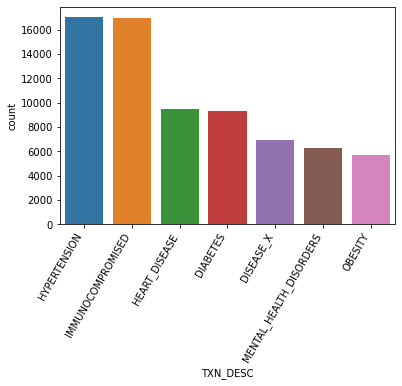

In [50]:
fact_txn_con = fact_txn.loc[fact_txn['TXN_TYPE'] == 'CONDITIONS']
sns.countplot(x= fact_txn_con['TXN_DESC'], order = fact_txn_con['TXN_DESC'].value_counts().index)
plt.xticks(rotation = 60, ha = 'right')
plt.show()

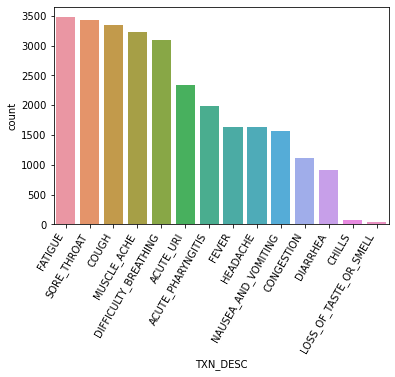

In [51]:
fact_txn_sym = fact_txn.loc[fact_txn['TXN_TYPE'] == 'SYMPTOMS']
sns.countplot(x= fact_txn_sym['TXN_DESC'], order = fact_txn_sym['TXN_DESC'].value_counts().index)
plt.xticks(rotation = 60, ha = 'right')
plt.show()

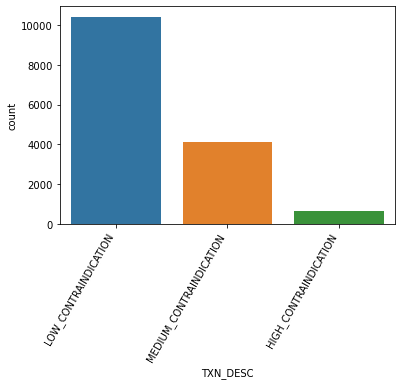

In [52]:
fact_txn_cont = fact_txn.loc[fact_txn['TXN_TYPE'] == 'CONTRAINDICATIONS']
sns.countplot(x= fact_txn_cont['TXN_DESC'], order = fact_txn_cont['TXN_DESC'].value_counts().index)
plt.xticks(rotation = 60, ha = 'right')
plt.show()

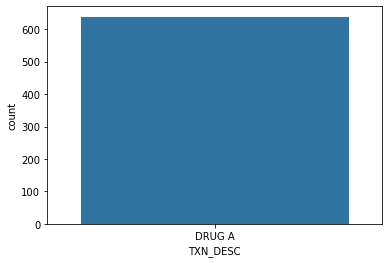

In [53]:
fact_txn_treat = fact_txn.loc[fact_txn['TXN_TYPE'] == 'TREATMENTS']
sns.countplot(x= fact_txn_treat['TXN_DESC'], order = fact_txn_treat['TXN_DESC'].value_counts().index)
plt.show()

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

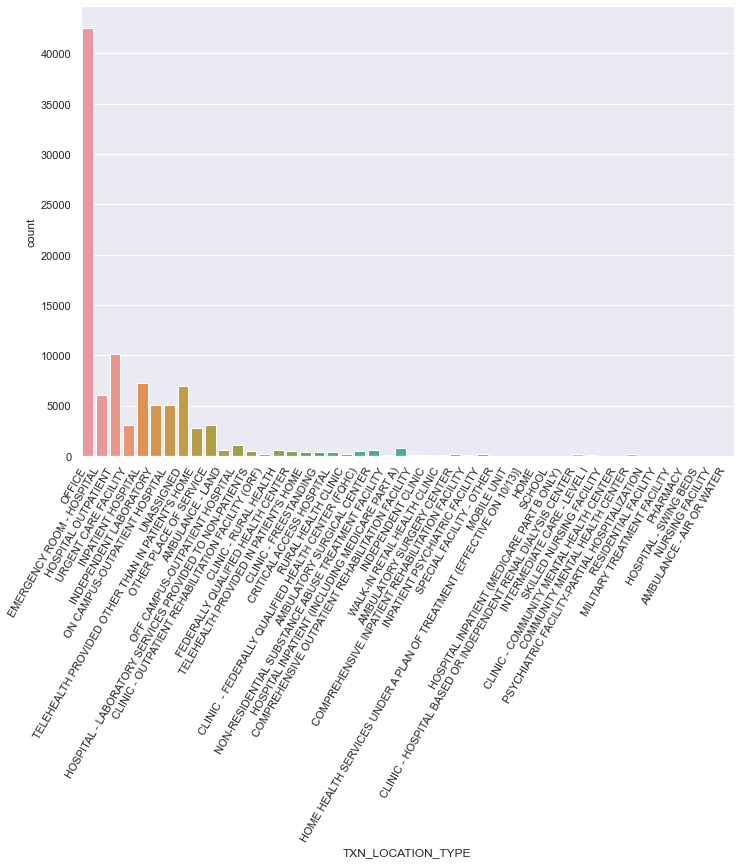

In [55]:
sns.countplot(x= fact_txn['TXN_LOCATION_TYPE'], order = fact_txn_sym['TXN_LOCATION_TYPE'].value_counts().index)
plt.xticks(rotation = 60, ha = 'right')
plt.show()

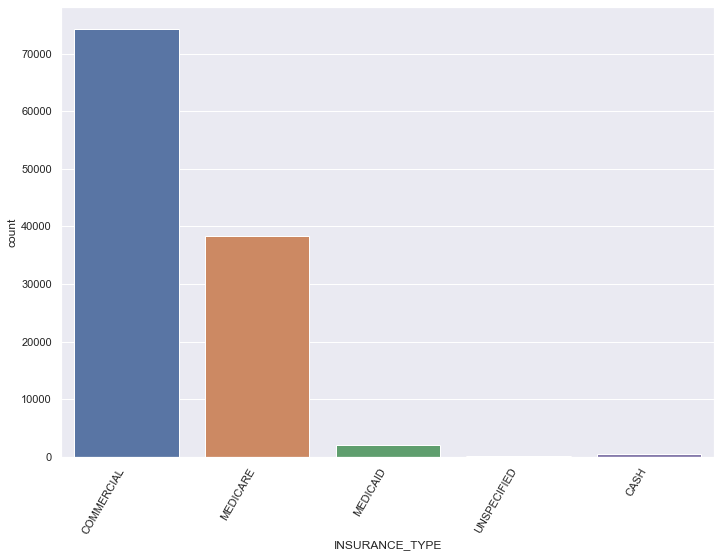

In [56]:
sns.countplot(x= fact_txn['INSURANCE_TYPE'], order = fact_txn_sym['INSURANCE_TYPE'].value_counts().index)
plt.xticks(rotation = 60, ha = 'right')
plt.show()

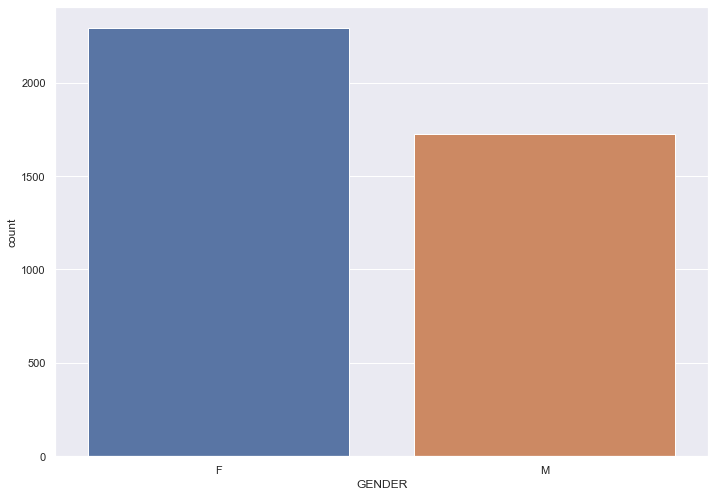

In [57]:
sns.countplot(x= dim_patient['GENDER'], order = dim_patient['GENDER'].value_counts().index)
plt.show()

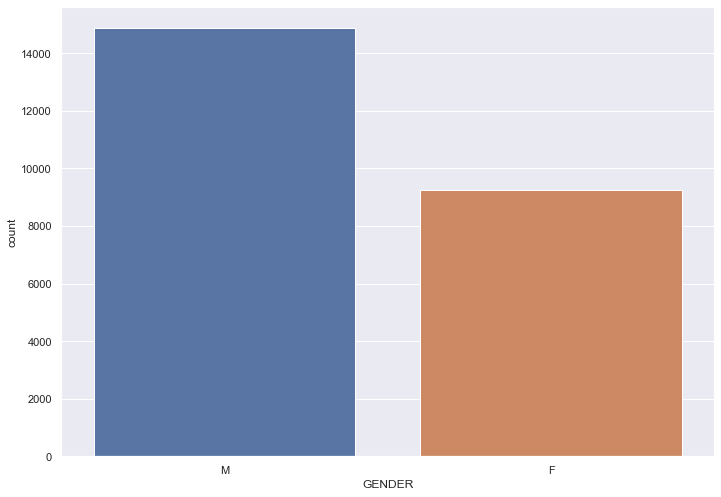

In [58]:
sns.countplot(x= dim_physician['GENDER'], order = dim_physician['GENDER'].value_counts().index)
plt.show()

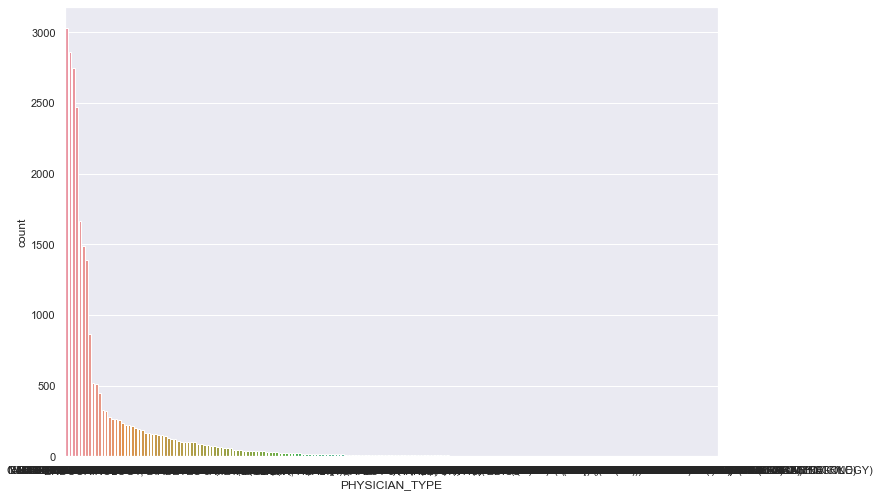

In [59]:
sns.countplot(x= dim_physician['PHYSICIAN_TYPE'], order = dim_physician['PHYSICIAN_TYPE'].value_counts().index)
plt.show()

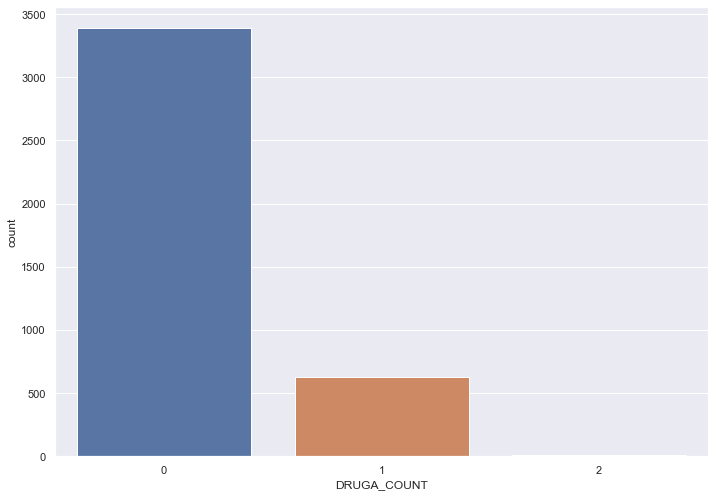

In [60]:
sns.countplot(x= fact_txn_treatment['DRUGA_COUNT'], order = fact_txn_treatment['DRUGA_COUNT'].value_counts().index)
plt.show()


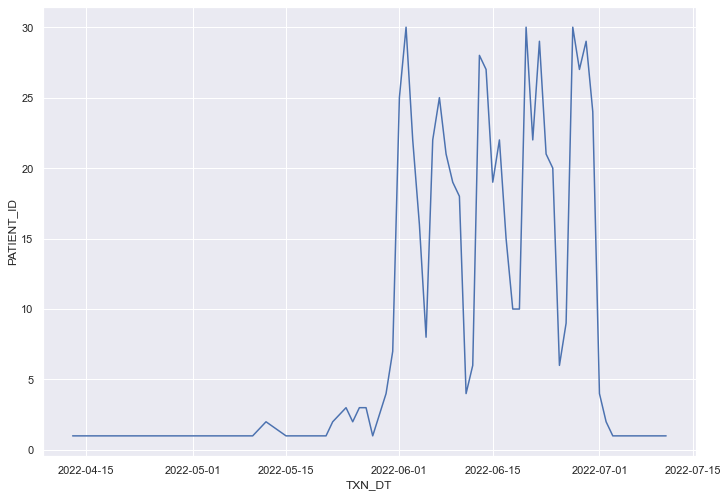

In [61]:
sns.lineplot(x = 'TXN_DT', y = 'PATIENT_ID', data = fact_txn_treat.groupby('TXN_DT').count())
plt.show()

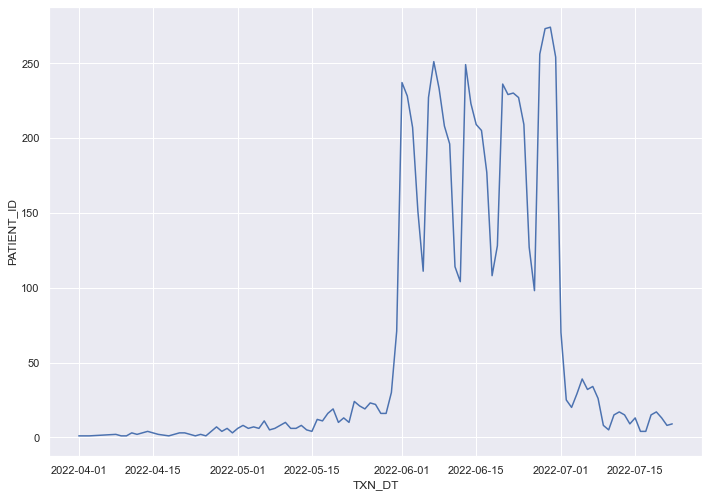

In [62]:
fact_txn_disx = fact_txn.loc[fact_txn['TXN_DESC'] == 'DISEASE_X']
sns.lineplot(x = 'TXN_DT', y = 'PATIENT_ID', data = fact_txn_disx.groupby('TXN_DT').count())
plt.show()

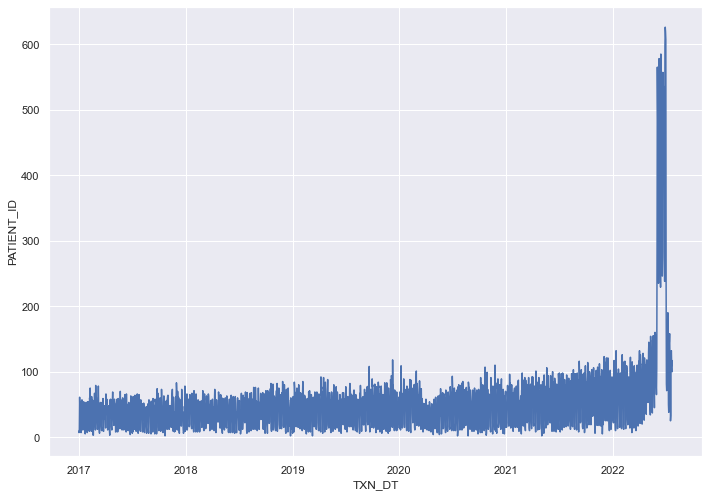

In [63]:
sns.lineplot(x = 'TXN_DT', y = 'PATIENT_ID', data = fact_txn.groupby('TXN_DT').count())
plt.show()

### 5. Create model table

In [64]:
#Create model_table from dim_patient to add PATIENT_ID, BIRTH_DATE (Required to calculate age at first diagnosis), PATIENT_GENDER
model_table = dim_patient.drop(columns=['BIRTH_YEAR', 'GENDER'])
print(model_table)

      PATIENT_ID BIRTH_DATE  PATIENT_AGE PATIENT_GENDER
0              1 1988-01-01           34         M-Male
1              2 2020-01-01            2         M-Male
2              3 1973-01-01           49         M-Male
3              4 2022-01-01            0         M-Male
4              5 1988-01-01           34         M-Male
...          ...        ...          ...            ...
4015        4016 1947-01-01           75       F-Female
4016        4017 1937-01-01           85       F-Female
4017        4018 1937-01-01           85       F-Female
4018        4019 1958-01-01           64         M-Male
4019        4020 1941-01-01           81       F-Female

[4020 rows x 4 columns]


In [65]:
print(model_table)

      PATIENT_ID BIRTH_DATE  PATIENT_AGE PATIENT_GENDER
0              1 1988-01-01           34         M-Male
1              2 2020-01-01            2         M-Male
2              3 1973-01-01           49         M-Male
3              4 2022-01-01            0         M-Male
4              5 1988-01-01           34         M-Male
...          ...        ...          ...            ...
4015        4016 1947-01-01           75       F-Female
4016        4017 1937-01-01           85       F-Female
4017        4018 1937-01-01           85       F-Female
4018        4019 1958-01-01           64         M-Male
4019        4020 1941-01-01           81       F-Female

[4020 rows x 4 columns]


In [66]:
#join model_table (dim_patient) with fact_txn_num_conditions to add NUM_CONDITIONS
#left join, left= model_table
model_table = pd.merge(left=model_table, right=fact_txn_num_conditions, how='left', left_on='PATIENT_ID', right_on='PATIENT_ID')
model_table

PATIENT_ID BIRTH_DATE  PATIENT_AGE PATIENT_GENDER  NUM_CONDITIONS
0              1 1988-01-01           34         M-Male               1
1              2 2020-01-01            2         M-Male               1
2              3 1973-01-01           49         M-Male               1
3              4 2022-01-01            0         M-Male               1
4              5 1988-01-01           34         M-Male               1
...          ...        ...          ...            ...             ...
4015        4016 1947-01-01           75       F-Female              71
4016        4017 1937-01-01           85       F-Female              64
4017        4018 1937-01-01           85       F-Female              68
4018        4019 1958-01-01           64         M-Male              15
4019        4020 1941-01-01           81       F-Female              29

[4020 rows x 5 columns]

In [67]:
#join model_table with fact_txn_disease_x_features to add DISEASEX_DT, LOCATION_TYPE and INSURANCE_TYPE (as extra feature)
#left join, left= model_table
model_table = pd.merge(left=model_table, right=fact_txn_disease_x_features, how='left', left_on='PATIENT_ID', right_on='PATIENT_ID')
model_table

PATIENT_ID BIRTH_DATE  PATIENT_AGE PATIENT_GENDER  NUM_CONDITIONS  \
0              1 1988-01-01           34         M-Male               1   
1              2 2020-01-01            2         M-Male               1   
2              3 1973-01-01           49         M-Male               1   
3              4 2022-01-01            0         M-Male               1   
4              5 1988-01-01           34         M-Male               1   
...          ...        ...          ...            ...             ...   
4015        4016 1947-01-01           75       F-Female              71   
4016        4017 1937-01-01           85       F-Female              64   
4017        4018 1937-01-01           85       F-Female              68   
4018        4019 1958-01-01           64         M-Male              15   
4019        4020 1941-01-01           81       F-Female              29   

         TXN_DT  PHYSICIAN_ID               TXN_LOCATION_TYPE INSURANCE_TYPE  \
0    2022-06-11         24633       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
1    2022-06-22          7777       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
2    2022-06-20         17051                          OFFICE     COMMERCIAL   
3    2022-06-30         19478       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
4    2022-06-02          <NA>          INDEPENDENT LABORATORY     COMMERCIAL   
...         ...           ...                             ...            ...   
4015 2022-06-03         15294                          OFFICE       MEDICARE   
4016 2022-06-21         11575  OFF CAMPUS-OUTPATIENT HOSPITAL       MEDICARE   
4017 2022-06-24          <NA>          OTHER PLACE OF SERVICE     COMMERCIAL   
4018 2022-06-07          5402       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
4019 2022-06-27         17966                          OFFICE     COMMERCIAL   

        TXN_TYPE   TXN_DESC  RANK  
0     CONDITIONS  DISEASE_X     1  
1     CONDITIONS  DISEASE_X     1  
2     CONDITIONS  DISEASE_X     1  
3     CONDITIONS  DISEASE_X     1  
4     CONDITIONS  DISEASE_X     1  
...          ...        ...   ...  
4015  CONDITIONS  DISEASE_X     1  
4016  CONDITIONS  DISEASE_X     1  
4017  CONDITIONS  DISEASE_X     1  
4018  CONDITIONS  DISEASE_X     1  
4019  CONDITIONS  DISEASE_X     1  

[4020 rows x 12 columns]

In [68]:
#calculate age of patient when diagnosed with Disease X

#from datetime import date
def calculate_age_diagnosed(birth, txn_date):
    return txn_date.year - birth.year - ((txn_date.month, txn_date.day) < (birth.month, birth.day))

In [69]:
model_table['PATIENT_AGE_DIAGNOSED'] = model_table.apply(lambda x: calculate_age_diagnosed(x['BIRTH_DATE'], x['TXN_DT']), axis=1)

In [70]:
#remove columns not needed
model_table = model_table.drop(columns=['TXN_TYPE', 'TXN_DESC', 'RANK'])
print(model_table)

      PATIENT_ID BIRTH_DATE  PATIENT_AGE PATIENT_GENDER  NUM_CONDITIONS  \
0              1 1988-01-01           34         M-Male               1   
1              2 2020-01-01            2         M-Male               1   
2              3 1973-01-01           49         M-Male               1   
3              4 2022-01-01            0         M-Male               1   
4              5 1988-01-01           34         M-Male               1   
...          ...        ...          ...            ...             ...   
4015        4016 1947-01-01           75       F-Female              71   
4016        4017 1937-01-01           85       F-Female              64   
4017        4018 1937-01-01           85       F-Female              68   
4018        4019 1958-01-01           64         M-Male              15   
4019        4020 1941-01-01           81       F-Female              29   

         TXN_DT  PHYSICIAN_ID               TXN_LOCATION_TYPE INSURANCE_TYPE  \
0    2022-06-11    

In [71]:
#join model_table with dim_physician to add PHYSICIAN_TYPE, PHYSICIAN_STATE, PHYSICIAN_STATE_NAME (as extra feature for data viz)
model_table = pd.merge(left=model_table, right=dim_physician, how='left', left_on='PHYSICIAN_ID', right_on='PHYSICIAN_ID')
model_table

PATIENT_ID BIRTH_DATE  PATIENT_AGE PATIENT_GENDER  NUM_CONDITIONS  \
0              1 1988-01-01           34         M-Male               1   
1              2 2020-01-01            2         M-Male               1   
2              3 1973-01-01           49         M-Male               1   
3              4 2022-01-01            0         M-Male               1   
4              5 1988-01-01           34         M-Male               1   
...          ...        ...          ...            ...             ...   
4015        4016 1947-01-01           75       F-Female              71   
4016        4017 1937-01-01           85       F-Female              64   
4017        4018 1937-01-01           85       F-Female              68   
4018        4019 1958-01-01           64         M-Male              15   
4019        4020 1941-01-01           81       F-Female              29   

         TXN_DT  PHYSICIAN_ID               TXN_LOCATION_TYPE INSURANCE_TYPE  \
0    2022-06-11         24633       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
1    2022-06-22          7777       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
2    2022-06-20         17051                          OFFICE     COMMERCIAL   
3    2022-06-30         19478       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
4    2022-06-02          <NA>          INDEPENDENT LABORATORY     COMMERCIAL   
...         ...           ...                             ...            ...   
4015 2022-06-03         15294                          OFFICE       MEDICARE   
4016 2022-06-21         11575  OFF CAMPUS-OUTPATIENT HOSPITAL       MEDICARE   
4017 2022-06-24          <NA>          OTHER PLACE OF SERVICE     COMMERCIAL   
4018 2022-06-07          5402       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
4019 2022-06-27         17966                          OFFICE     COMMERCIAL   

      PATIENT_AGE_DIAGNOSED STATE      PHYSICIAN_TYPE GENDER  BIRTH_YEAR  \
0                        34    TX     FAMILY MEDICINE      M        1953   
1                         2    PA  EMERGENCY MEDICINE      M        1984   
2                        49    MS  EMERGENCY MEDICINE      F        1969   
3                         0    PA          PEDIATRICS      F        1961   
4                        34   NaN                 NaN    NaN        <NA>   
...                     ...   ...                 ...    ...         ...   
4015                     75    NJ   INTERNAL MEDICINE      F        1968   
4016                     85    IL     FAMILY MEDICINE      F        1963   
4017                     85   NaN                 NaN    NaN        <NA>   
4018                     64    TX  EMERGENCY MEDICINE      F        1985   
4019                     81    WI     FAMILY MEDICINE      M        1967   

        STATE_NAME  
0            Texas  
1     Pennsylvania  
2      Mississippi  
3     Pennsylvania  
4              NaN  
...            ...  
4015    New Jersey  
4016      Illinois  
4017           NaN  
4018         Texas  
4019     Wisconsin  

[4020 rows x 15 columns]

In [72]:
print(model_table['PHYSICIAN_ID'].nunique())
print(dim_physician['PHYSICIAN_ID'].nunique())

3283
25343


In [73]:
#join model_table with fact_txn_treatment to add TARGET, and DRUG_COUNT (as extra feature)
model_table = pd.merge(left=model_table, right=fact_txn_treatment, how='left', left_on='PATIENT_ID', right_on='PATIENT_ID')
model_table

PATIENT_ID BIRTH_DATE  PATIENT_AGE PATIENT_GENDER  NUM_CONDITIONS  \
0              1 1988-01-01           34         M-Male               1   
1              2 2020-01-01            2         M-Male               1   
2              3 1973-01-01           49         M-Male               1   
3              4 2022-01-01            0         M-Male               1   
4              5 1988-01-01           34         M-Male               1   
...          ...        ...          ...            ...             ...   
4015        4016 1947-01-01           75       F-Female              71   
4016        4017 1937-01-01           85       F-Female              64   
4017        4018 1937-01-01           85       F-Female              68   
4018        4019 1958-01-01           64         M-Male              15   
4019        4020 1941-01-01           81       F-Female              29   

         TXN_DT  PHYSICIAN_ID               TXN_LOCATION_TYPE INSURANCE_TYPE  \
0    2022-06-11         24633       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
1    2022-06-22          7777       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
2    2022-06-20         17051                          OFFICE     COMMERCIAL   
3    2022-06-30         19478       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
4    2022-06-02          <NA>          INDEPENDENT LABORATORY     COMMERCIAL   
...         ...           ...                             ...            ...   
4015 2022-06-03         15294                          OFFICE       MEDICARE   
4016 2022-06-21         11575  OFF CAMPUS-OUTPATIENT HOSPITAL       MEDICARE   
4017 2022-06-24          <NA>          OTHER PLACE OF SERVICE     COMMERCIAL   
4018 2022-06-07          5402       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
4019 2022-06-27         17966                          OFFICE     COMMERCIAL   

      PATIENT_AGE_DIAGNOSED STATE      PHYSICIAN_TYPE GENDER  BIRTH_YEAR  \
0                        34    TX     FAMILY MEDICINE      M        1953   
1                         2    PA  EMERGENCY MEDICINE      M        1984   
2                        49    MS  EMERGENCY MEDICINE      F        1969   
3                         0    PA          PEDIATRICS      F        1961   
4                        34   NaN                 NaN    NaN        <NA>   
...                     ...   ...                 ...    ...         ...   
4015                     75    NJ   INTERNAL MEDICINE      F        1968   
4016                     85    IL     FAMILY MEDICINE      F        1963   
4017                     85   NaN                 NaN    NaN        <NA>   
4018                     64    TX  EMERGENCY MEDICINE      F        1985   
4019                     81    WI     FAMILY MEDICINE      M        1967   

        STATE_NAME  DRUGA_COUNT  TARGET  
0            Texas            0       0  
1     Pennsylvania            0       0  
2      Mississippi            0       0  
3     Pennsylvania            0       0  
4              NaN            0       0  
...            ...          ...     ...  
4015    New Jersey            0       0  
4016      Illinois            1       1  
4017           NaN            0       0  
4018         Texas            1       1  
4019     Wisconsin            1       1  

[4020 rows x 17 columns]

In [74]:
#join model_table with fact_txn_num_contraindications
#left join, left= model_table
model_table = pd.merge(left=model_table, right=fact_txn_num_contraindications, how='left', left_on='PATIENT_ID', right_on='PATIENT_ID')
model_table

PATIENT_ID BIRTH_DATE  PATIENT_AGE PATIENT_GENDER  NUM_CONDITIONS  \
0              1 1988-01-01           34         M-Male               1   
1              2 2020-01-01            2         M-Male               1   
2              3 1973-01-01           49         M-Male               1   
3              4 2022-01-01            0         M-Male               1   
4              5 1988-01-01           34         M-Male               1   
...          ...        ...          ...            ...             ...   
4015        4016 1947-01-01           75       F-Female              71   
4016        4017 1937-01-01           85       F-Female              64   
4017        4018 1937-01-01           85       F-Female              68   
4018        4019 1958-01-01           64         M-Male              15   
4019        4020 1941-01-01           81       F-Female              29   

         TXN_DT  PHYSICIAN_ID               TXN_LOCATION_TYPE INSURANCE_TYPE  \
0    2022-06-11         24633       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
1    2022-06-22          7777       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
2    2022-06-20         17051                          OFFICE     COMMERCIAL   
3    2022-06-30         19478       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
4    2022-06-02          <NA>          INDEPENDENT LABORATORY     COMMERCIAL   
...         ...           ...                             ...            ...   
4015 2022-06-03         15294                          OFFICE       MEDICARE   
4016 2022-06-21         11575  OFF CAMPUS-OUTPATIENT HOSPITAL       MEDICARE   
4017 2022-06-24          <NA>          OTHER PLACE OF SERVICE     COMMERCIAL   
4018 2022-06-07          5402       EMERGENCY ROOM - HOSPITAL     COMMERCIAL   
4019 2022-06-27         17966                          OFFICE     COMMERCIAL   

      PATIENT_AGE_DIAGNOSED STATE      PHYSICIAN_TYPE GENDER  BIRTH_YEAR  \
0                        34    TX     FAMILY MEDICINE      M        1953   
1                         2    PA  EMERGENCY MEDICINE      M        1984   
2                        49    MS  EMERGENCY MEDICINE      F        1969   
3                         0    PA          PEDIATRICS      F        1961   
4                        34   NaN                 NaN    NaN        <NA>   
...                     ...   ...                 ...    ...         ...   
4015                     75    NJ   INTERNAL MEDICINE      F        1968   
4016                     85    IL     FAMILY MEDICINE      F        1963   
4017                     85   NaN                 NaN    NaN        <NA>   
4018                     64    TX  EMERGENCY MEDICINE      F        1985   
4019                     81    WI     FAMILY MEDICINE      M        1967   

        STATE_NAME  DRUGA_COUNT  TARGET  NUM_CONTRAINDICATIONS  
0            Texas            0       0                      0  
1     Pennsylvania            0       0                      0  
2      Mississippi            0       0                      0  
3     Pennsylvania            0       0                      0  
4              NaN            0       0                      0  
...            ...          ...     ...                    ...  
4015    New Jersey            0       0                      6  
4016      Illinois            1       1                     54  
4017           NaN            0       0                     37  
4018         Texas            1       1                     39  
4019     Wisconsin            1       1                      1  

[4020 rows x 18 columns]

In [75]:
#set model table column names and order as expected 
model_table = model_table.drop(columns=['BIRTH_DATE', 'PHYSICIAN_ID', 'GENDER', 'BIRTH_YEAR', 'STATE_NAME', 'PATIENT_AGE','DRUGA_COUNT'])
model_table.rename(columns = {'TXN_DT':'DISEASEX_DT', 'TXN_LOCATION_TYPE':'LOCATION_TYPE', 'STATE': 'PHYSICIAN_STATE', 'PATIENT_AGE_DIAGNOSED': 'PATIENT_AGE'}, inplace = True)
model_table

PATIENT_ID PATIENT_GENDER  NUM_CONDITIONS DISEASEX_DT  \
0              1         M-Male               1  2022-06-11   
1              2         M-Male               1  2022-06-22   
2              3         M-Male               1  2022-06-20   
3              4         M-Male               1  2022-06-30   
4              5         M-Male               1  2022-06-02   
...          ...            ...             ...         ...   
4015        4016       F-Female              71  2022-06-03   
4016        4017       F-Female              64  2022-06-21   
4017        4018       F-Female              68  2022-06-24   
4018        4019         M-Male              15  2022-06-07   
4019        4020       F-Female              29  2022-06-27   

                       LOCATION_TYPE INSURANCE_TYPE  PATIENT_AGE  \
0          EMERGENCY ROOM - HOSPITAL     COMMERCIAL           34   
1          EMERGENCY ROOM - HOSPITAL     COMMERCIAL            2   
2                             OFFICE     COMMERCIAL           49   
3          EMERGENCY ROOM - HOSPITAL     COMMERCIAL            0   
4             INDEPENDENT LABORATORY     COMMERCIAL           34   
...                              ...            ...          ...   
4015                          OFFICE       MEDICARE           75   
4016  OFF CAMPUS-OUTPATIENT HOSPITAL       MEDICARE           85   
4017          OTHER PLACE OF SERVICE     COMMERCIAL           85   
4018       EMERGENCY ROOM - HOSPITAL     COMMERCIAL           64   
4019                          OFFICE     COMMERCIAL           81   

     PHYSICIAN_STATE      PHYSICIAN_TYPE  TARGET  NUM_CONTRAINDICATIONS  
0                 TX     FAMILY MEDICINE       0                      0  
1                 PA  EMERGENCY MEDICINE       0                      0  
2                 MS  EMERGENCY MEDICINE       0                      0  
3                 PA          PEDIATRICS       0                      0  
4                NaN                 NaN       0                      0  
...              ...                 ...     ...                    ...  
4015              NJ   INTERNAL MEDICINE       0                      6  
4016              IL     FAMILY MEDICINE       1                     54  
4017             NaN                 NaN       0                     37  
4018              TX  EMERGENCY MEDICINE       1                     39  
4019              WI     FAMILY MEDICINE       1                      1  

[4020 rows x 11 columns]

In [76]:
model_table = model_table.iloc[:,[0,9,3,6,1,2,8,7,4,5,10]]
model_table

PATIENT_ID  TARGET DISEASEX_DT  PATIENT_AGE PATIENT_GENDER  \
0              1       0  2022-06-11           34         M-Male   
1              2       0  2022-06-22            2         M-Male   
2              3       0  2022-06-20           49         M-Male   
3              4       0  2022-06-30            0         M-Male   
4              5       0  2022-06-02           34         M-Male   
...          ...     ...         ...          ...            ...   
4015        4016       0  2022-06-03           75       F-Female   
4016        4017       1  2022-06-21           85       F-Female   
4017        4018       0  2022-06-24           85       F-Female   
4018        4019       1  2022-06-07           64         M-Male   
4019        4020       1  2022-06-27           81       F-Female   

      NUM_CONDITIONS      PHYSICIAN_TYPE PHYSICIAN_STATE  \
0                  1     FAMILY MEDICINE              TX   
1                  1  EMERGENCY MEDICINE              PA   
2                  1  EMERGENCY MEDICINE              MS   
3                  1          PEDIATRICS              PA   
4                  1                 NaN             NaN   
...              ...                 ...             ...   
4015              71   INTERNAL MEDICINE              NJ   
4016              64     FAMILY MEDICINE              IL   
4017              68                 NaN             NaN   
4018              15  EMERGENCY MEDICINE              TX   
4019              29     FAMILY MEDICINE              WI   

                       LOCATION_TYPE INSURANCE_TYPE  NUM_CONTRAINDICATIONS  
0          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0  
1          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0  
2                             OFFICE     COMMERCIAL                      0  
3          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0  
4             INDEPENDENT LABORATORY     COMMERCIAL                      0  
...                              ...            ...                    ...  
4015                          OFFICE       MEDICARE                      6  
4016  OFF CAMPUS-OUTPATIENT HOSPITAL       MEDICARE                     54  
4017          OTHER PLACE OF SERVICE     COMMERCIAL                     37  
4018       EMERGENCY ROOM - HOSPITAL     COMMERCIAL                     39  
4019                          OFFICE     COMMERCIAL                      1  

[4020 rows x 11 columns]

In [77]:
#join extra features DISEASEX_COUNT
#left join, left= model_table
model_table = pd.merge(left=model_table, right=fact_txn_disease_x, how='left', left_on='PATIENT_ID', right_on='PATIENT_ID')
model_table


PATIENT_ID  TARGET DISEASEX_DT  PATIENT_AGE PATIENT_GENDER  \
0              1       0  2022-06-11           34         M-Male   
1              2       0  2022-06-22            2         M-Male   
2              3       0  2022-06-20           49         M-Male   
3              4       0  2022-06-30            0         M-Male   
4              5       0  2022-06-02           34         M-Male   
...          ...     ...         ...          ...            ...   
4015        4016       0  2022-06-03           75       F-Female   
4016        4017       1  2022-06-21           85       F-Female   
4017        4018       0  2022-06-24           85       F-Female   
4018        4019       1  2022-06-07           64         M-Male   
4019        4020       1  2022-06-27           81       F-Female   

      NUM_CONDITIONS      PHYSICIAN_TYPE PHYSICIAN_STATE  \
0                  1     FAMILY MEDICINE              TX   
1                  1  EMERGENCY MEDICINE              PA   
2                  1  EMERGENCY MEDICINE              MS   
3                  1          PEDIATRICS              PA   
4                  1                 NaN             NaN   
...              ...                 ...             ...   
4015              71   INTERNAL MEDICINE              NJ   
4016              64     FAMILY MEDICINE              IL   
4017              68                 NaN             NaN   
4018              15  EMERGENCY MEDICINE              TX   
4019              29     FAMILY MEDICINE              WI   

                       LOCATION_TYPE INSURANCE_TYPE  NUM_CONTRAINDICATIONS  \
0          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0   
1          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0   
2                             OFFICE     COMMERCIAL                      0   
3          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0   
4             INDEPENDENT LABORATORY     COMMERCIAL                      0   
...                              ...            ...                    ...   
4015                          OFFICE       MEDICARE                      6   
4016  OFF CAMPUS-OUTPATIENT HOSPITAL       MEDICARE                     54   
4017          OTHER PLACE OF SERVICE     COMMERCIAL                     37   
4018       EMERGENCY ROOM - HOSPITAL     COMMERCIAL                     39   
4019                          OFFICE     COMMERCIAL                      1   

      DISEASEX_COUNT  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
4015               1  
4016               3  
4017               1  
4018               3  
4019               1  

[4020 rows x 12 columns]

In [78]:
#join extra features NUM_SYMPTOMS
#left join, left= model_table
model_table = pd.merge(left=model_table, right=fact_txn_num_symptoms, how='left', left_on='PATIENT_ID', right_on='PATIENT_ID')
model_table


PATIENT_ID  TARGET DISEASEX_DT  PATIENT_AGE PATIENT_GENDER  \
0              1       0  2022-06-11           34         M-Male   
1              2       0  2022-06-22            2         M-Male   
2              3       0  2022-06-20           49         M-Male   
3              4       0  2022-06-30            0         M-Male   
4              5       0  2022-06-02           34         M-Male   
...          ...     ...         ...          ...            ...   
4015        4016       0  2022-06-03           75       F-Female   
4016        4017       1  2022-06-21           85       F-Female   
4017        4018       0  2022-06-24           85       F-Female   
4018        4019       1  2022-06-07           64         M-Male   
4019        4020       1  2022-06-27           81       F-Female   

      NUM_CONDITIONS      PHYSICIAN_TYPE PHYSICIAN_STATE  \
0                  1     FAMILY MEDICINE              TX   
1                  1  EMERGENCY MEDICINE              PA   
2                  1  EMERGENCY MEDICINE              MS   
3                  1          PEDIATRICS              PA   
4                  1                 NaN             NaN   
...              ...                 ...             ...   
4015              71   INTERNAL MEDICINE              NJ   
4016              64     FAMILY MEDICINE              IL   
4017              68                 NaN             NaN   
4018              15  EMERGENCY MEDICINE              TX   
4019              29     FAMILY MEDICINE              WI   

                       LOCATION_TYPE INSURANCE_TYPE  NUM_CONTRAINDICATIONS  \
0          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0   
1          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0   
2                             OFFICE     COMMERCIAL                      0   
3          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0   
4             INDEPENDENT LABORATORY     COMMERCIAL                      0   
...                              ...            ...                    ...   
4015                          OFFICE       MEDICARE                      6   
4016  OFF CAMPUS-OUTPATIENT HOSPITAL       MEDICARE                     54   
4017          OTHER PLACE OF SERVICE     COMMERCIAL                     37   
4018       EMERGENCY ROOM - HOSPITAL     COMMERCIAL                     39   
4019                          OFFICE     COMMERCIAL                      1   

      DISEASEX_COUNT  NUM_SYMPTOMS  
0                  1             0  
1                  1             1  
2                  1             0  
3                  1             0  
4                  1             0  
...              ...           ...  
4015               1            36  
4016               3            46  
4017               1             8  
4018               3            46  
4019               1             4  

[4020 rows x 13 columns]

In [79]:
#join extra features contraindications types
#left join, left= model_table
model_table = pd.merge(left=model_table, right=fact_txn_highcont, how='left', left_on='PATIENT_ID', right_on='PATIENT_ID')
model_table = pd.merge(left=model_table, right=fact_txn_medcont, how='left', left_on='PATIENT_ID', right_on='PATIENT_ID')
model_table = pd.merge(left=model_table, right=fact_txn_lowcont, how='left', left_on='PATIENT_ID', right_on='PATIENT_ID')
model_table


PATIENT_ID  TARGET DISEASEX_DT  PATIENT_AGE PATIENT_GENDER  \
0              1       0  2022-06-11           34         M-Male   
1              2       0  2022-06-22            2         M-Male   
2              3       0  2022-06-20           49         M-Male   
3              4       0  2022-06-30            0         M-Male   
4              5       0  2022-06-02           34         M-Male   
...          ...     ...         ...          ...            ...   
4015        4016       0  2022-06-03           75       F-Female   
4016        4017       1  2022-06-21           85       F-Female   
4017        4018       0  2022-06-24           85       F-Female   
4018        4019       1  2022-06-07           64         M-Male   
4019        4020       1  2022-06-27           81       F-Female   

      NUM_CONDITIONS      PHYSICIAN_TYPE PHYSICIAN_STATE  \
0                  1     FAMILY MEDICINE              TX   
1                  1  EMERGENCY MEDICINE              PA   
2                  1  EMERGENCY MEDICINE              MS   
3                  1          PEDIATRICS              PA   
4                  1                 NaN             NaN   
...              ...                 ...             ...   
4015              71   INTERNAL MEDICINE              NJ   
4016              64     FAMILY MEDICINE              IL   
4017              68                 NaN             NaN   
4018              15  EMERGENCY MEDICINE              TX   
4019              29     FAMILY MEDICINE              WI   

                       LOCATION_TYPE INSURANCE_TYPE  NUM_CONTRAINDICATIONS  \
0          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0   
1          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0   
2                             OFFICE     COMMERCIAL                      0   
3          EMERGENCY ROOM - HOSPITAL     COMMERCIAL                      0   
4             INDEPENDENT LABORATORY     COMMERCIAL                      0   
...                              ...            ...                    ...   
4015                          OFFICE       MEDICARE                      6   
4016  OFF CAMPUS-OUTPATIENT HOSPITAL       MEDICARE                     54   
4017          OTHER PLACE OF SERVICE     COMMERCIAL                     37   
4018       EMERGENCY ROOM - HOSPITAL     COMMERCIAL                     39   
4019                          OFFICE     COMMERCIAL                      1   

      DISEASEX_COUNT  NUM_SYMPTOMS  HIGHCONT_COUNT  MEDCONT_COUNT  \
0                  1             0               0              0   
1                  1             1               0              0   
2                  1             0               0              0   
3                  1             0               0              0   
4                  1             0               0              0   
...              ...           ...             ...            ...   
4015               1            36               0              0   
4016               3            46               0              0   
4017               1             8               0              0   
4018               3            46              31              0   
4019               1             4               0              0   

      LOWCONT_COUNT  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4015              6  
4016             54  
4017             37  
4018              8  
4019              1  

[4020 rows x 16 columns]

In [80]:
#review data types
model_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4020 entries, 0 to 4019
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   PATIENT_ID             4020 non-null   int64         
 1   TARGET                 4020 non-null   int32         
 2   DISEASEX_DT            4020 non-null   datetime64[ns]
 3   PATIENT_AGE            4020 non-null   int64         
 4   PATIENT_GENDER         4020 non-null   category      
 5   NUM_CONDITIONS         4020 non-null   int64         
 6   PHYSICIAN_TYPE         3407 non-null   category      
 7   PHYSICIAN_STATE        3407 non-null   category      
 8   LOCATION_TYPE          4020 non-null   category      
 9   INSURANCE_TYPE         4020 non-null   category      
 10  NUM_CONTRAINDICATIONS  4020 non-null   int64         
 11  DISEASEX_COUNT         4020 non-null   int64         
 12  NUM_SYMPTOMS           4020 non-null   int64         
 13  HIG

### 6. Save model_table to .csv

In [81]:
model_table.to_csv('C:/Users/nazareth.lopez/sandbox/DSI/model_table.csv', index= False)

### 7. Data viz exploration

The idea is to prototype and create useful visualization of the model_table that can be transcribed to a plotly dashboard application. 

Note: per time limitations, these visualizations are not considering accesibility and responsiveness. 

In [82]:
map_df = model_table.groupby('PHYSICIAN_STATE')['TARGET'].apply(lambda x: (x > 0).sum()).reset_index(name='SUM_TARGET')
map_df

PHYSICIAN_STATE  SUM_TARGET
0               AE           0
1               AK           0
2               AL           7
3               AP           0
4               AR           4
5               AZ          12
6               CA          95
7               CO          11
8               CT           7
9               DC           4
10              DE           4
11              FL          39
12              GA          24
13              GU           0
14              HI           1
15              IA           4
16              ID           2
17              IL          11
18              IN           4
19              KS           4
20              KY           6
21              LA           3
22              MA          19
23              MD          20
24              ME           1
25              MI          38
26              MN           5
27              MO           6
28              MP           0
29              MS           3
30              MT           0
31              NC          12
32              ND           1
33              NE           2
34              NH           1
35              NJ          15
36              NM           7
37              NV           4
38              NY          31
39              OH          12
40              OK           3
41              OR           5
42              PA          19
43              PR           1
44              RI           8
45              SC           5
46              SD           2
47              TN          18
48              TX          63
49              UT           8
50              VA          13
51              VI           0
52              VT           0
53              WA          11
54              WI           9
55              WV           2
56              WY           0

In [83]:
map_df_per = model_table.groupby('PHYSICIAN_STATE')['PATIENT_ID'].count().reset_index(name='PATIENT_COUNT')
map_df_per

PHYSICIAN_STATE  PATIENT_COUNT
0               AE              0
1               AK              6
2               AL             50
3               AP              0
4               AR             31
5               AZ             60
6               CA            460
7               CO             61
8               CT             43
9               DC             11
10              DE             14
11              FL            301
12              GA            101
13              GU              0
14              HI             17
15              IA             20
16              ID              6
17              IL            105
18              IN             49
19              KS             17
20              KY             52
21              LA             67
22              MA             73
23              MD            108
24              ME             13
25              MI            125
26              MN             43
27              MO             42
28              MP              0
29              MS             38
30              MT              7
31              NC             83
32              ND              2
33              NE             16
34              NH             14
35              NJ             90
36              NM             15
37              NV             35
38              NY            228
39              OH             96
40              OK             34
41              OR             42
42              PA            102
43              PR             11
44              RI             19
45              SC             69
46              SD              7
47              TN             71
48              TX            335
49              UT             20
50              VA             90
51              VI              0
52              VT              1
53              WA             64
54              WI             28
55              WV              9
56              WY              6

In [84]:
map_df = pd.merge(left=map_df, right=map_df_per, how='left', left_on='PHYSICIAN_STATE', right_on='PHYSICIAN_STATE')

In [85]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PHYSICIAN_STATE  57 non-null     category
 1   SUM_TARGET       57 non-null     int64   
 2   PATIENT_COUNT    57 non-null     int64   
dtypes: category(1), int64(2)
memory usage: 3.9 KB


In [86]:
map_df['PERCENTAGE'] = ((map_df['SUM_TARGET']*100)/map_df['PATIENT_COUNT']).round(decimals = 2)

In [87]:
import plotly.express as px

fig = px.choropleth(
    map_df,
    locations = 'PHYSICIAN_STATE',
    locationmode = 'USA-states',
    color = 'SUM_TARGET',
    scope = 'usa',
    color_continuous_scale = 'Blues',
    title = 'Drug A prescribed per state',
    hover_data = ['PATIENT_COUNT', 'PERCENTAGE'])

fig.show()

In [88]:
fig = px.histogram(model_table, y='PHYSICIAN_STATE', x='PATIENT_ID',
             color='TARGET', barmode='group',
             height=700, histfunc='count', color_discrete_map={1: '#3888c1', 0:'#b9d6e6'})
fig.show()
#this map has many categories, for next iterations an 'other states' category could be included to reduce clutter

In [89]:
donut_df = model_table.groupby('INSURANCE_TYPE')['INSURANCE_TYPE'].count().reset_index(name='COUNT')
donut_df.head()

INSURANCE_TYPE  COUNT
0           CASH      0
1     COMMERCIAL   3259
2       MEDICAID     79
3       MEDICARE    676
4    UNSPECIFIED      6

In [90]:
fig = px.histogram(model_table, x='PATIENT_GENDER', y='PATIENT_ID',
             color='TARGET', barmode='group',
             height=400, histfunc='count', color_discrete_map={1:'#3888c1', 0:'#b9d6e6'})
fig.update_layout(title='Patient gender and Drug A prescription',
                 yaxis=dict(
                 title='Patients',
                 titlefont_size=14,
                 tickfont_size=14),
                 xaxis=dict(
                 title='Patient gender',
                 titlefont_size=14,
                 tickfont_size=14))
fig.show()

In [91]:
t_1 = model_table.loc[model_table['TARGET'] == 1]
t_0 = model_table.loc[model_table['TARGET'] == 0]

In [92]:
counts1, bins1 = np.histogram(t_1.PATIENT_AGE, bins=range(0, 100, 10))
bins1 = 0.5 * (bins1[:-1] + bins1[1:])

counts0, bins0 = np.histogram(t_0.PATIENT_AGE, bins=range(0, 100, 10))
bins0 = 0.5 * (bins0[:-1] + bins0[1:])

fig = px.bar(x=bins1, y=counts1, labels={'x':'Age when diagnosed', 'y':'Patient count'}, color_discrete_sequence =['#3888c1'])
fig2 = px.bar(x=bins0, y=counts0, labels={'x':'Age when diagnosed', 'y':'Patient count'}, color_discrete_sequence = ['#b9d6e6'])

fig.add_trace(fig2.data[0])
fig.show()

In [93]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(name='0', x=bins0, y=counts0, marker_color='#b9d6e6'))
fig.add_trace(go.Bar(name='1', x=bins1, y=counts1, marker_color='#3888c1'))


fig.update_layout(title='Age of patients prescribed and not prescribed with drug A', 
        yaxis=dict(
        title='Patients',
        titlefont_size=16,
        tickfont_size=14),
        xaxis=dict(
        title='Patient age when diagnosed',
        titlefont_size=16,
        tickfont_size=14),
        legend_title='Target',
)
fig.show()

In [94]:
#Group other physician types
def physician_type(value, phy_type):
    if value < 16:
        return phy_type
    else:
        return 'Others'

In [95]:
df_phys_0 = model_table.loc[model_table['TARGET'] == 0]
df_phys_1 = model_table.loc[model_table['TARGET'] == 1]



In [96]:
model_table_gpt = model_table.groupby(['PHYSICIAN_TYPE']).size().to_frame().sort_values([0], ascending = False).head(10).reset_index()

fig = px.histogram(model_table, y='PHYSICIAN_TYPE', x='PATIENT_ID',
             color='TARGET', barmode='group', histfunc='count',
             height=700, color_discrete_map={1: '#3888c1', 0:'#b9d6e6'}).update_yaxes(categoryorder='total ascending')
fig.show()

In [97]:
#Create Age Bins
bins= [0,18,35,45,60,100]
labels = ['0-18','18-35','35-45','45-60','60-100']
model_table['AGE_GROUP'] = pd.cut(model_table.PATIENT_AGE, bins=bins, labels=labels, right=False)
model_table.head(10)

PATIENT_ID  TARGET DISEASEX_DT  PATIENT_AGE PATIENT_GENDER  NUM_CONDITIONS  \
0           1       0  2022-06-11           34         M-Male               1   
1           2       0  2022-06-22            2         M-Male               1   
2           3       0  2022-06-20           49         M-Male               1   
3           4       0  2022-06-30            0         M-Male               1   
4           5       0  2022-06-02           34         M-Male               1   
5           6       0  2022-06-17           71         M-Male               1   
6           7       0  2022-06-06            1         M-Male               1   
7           8       0  2022-06-28           45         M-Male               1   
8           9       0  2022-06-30           31         M-Male               2   
9          10       0  2022-06-01           74       F-Female               1   

         PHYSICIAN_TYPE PHYSICIAN_STATE              LOCATION_TYPE  \
0       FAMILY MEDICINE              TX  EMERGENCY ROOM - HOSPITAL   
1    EMERGENCY MEDICINE              PA  EMERGENCY ROOM - HOSPITAL   
2    EMERGENCY MEDICINE              MS                     OFFICE   
3            PEDIATRICS              PA  EMERGENCY ROOM - HOSPITAL   
4                   NaN             NaN     INDEPENDENT LABORATORY   
5                   NaN             NaN     INDEPENDENT LABORATORY   
6            PEDIATRICS              CA         INPATIENT HOSPITAL   
7  DIAGNOSTIC RADIOLOGY              WV  EMERGENCY ROOM - HOSPITAL   
8    EMERGENCY MEDICINE              ME        HOSPITAL OUTPATIENT   
9    NURSE PRACTITIONER              FL  EMERGENCY ROOM - HOSPITAL   

  INSURANCE_TYPE  NUM_CONTRAINDICATIONS  DISEASEX_COUNT  NUM_SYMPTOMS  \
0     COMMERCIAL                      0               1             0   
1     COMMERCIAL                      0               1             1   
2     COMMERCIAL                      0               1             0   
3     COMMERCIAL                      0               1             0   
4     COMMERCIAL                      0               1             0   
5     COMMERCIAL                      0               1             0   
6     COMMERCIAL                      0               1             0   
7     COMMERCIAL                      0               1             0   
8     COMMERCIAL                      0               2             0   
9     COMMERCIAL                      0               1             0   

   HIGHCONT_COUNT  MEDCONT_COUNT  LOWCONT_COUNT AGE_GROUP  
0               0              0              0     18-35  
1               0              0              0      0-18  
2               0              0              0     45-60  
3               0              0              0      0-18  
4               0              0              0     18-35  
5               0              0              0    60-100  
6               0              0              0      0-18  
7               0              0              0     45-60  
8               0              0              0     18-35  
9               0              0              0    60-100

In [98]:
# Create dimensions
class_dim = go.parcats.Dimension(
    values=model_table.AGE_GROUP,
    categoryorder='category ascending', label='Age'
)

gender_dim = go.parcats.Dimension(values=model_table.PATIENT_GENDER, label='Gender')

target_dim = go.parcats.Dimension(
    values=model_table.TARGET, label='Target', categoryarray=[0, 1],
    ticktext=['No Drug A', 'Drug A']
)

# Create parcats trace
color = model_table.TARGET;
colorscale = [[0, '#b9d6e6'], [1, '#3888c1']];

fig = go.Figure(data = [go.Parcats(dimensions=[class_dim, gender_dim, target_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='count+probability',
        arrangement='freeform')])

fig.show()

In [99]:
fig = go.Figure(data = [go.Parcats(dimensions=[gender_dim, class_dim, target_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='count+probability',
        arrangement='freeform')])

fig.show()

In [100]:
fig = px.histogram(model_table, x='AGE_GROUP', y='PATIENT_ID',
             color='TARGET', barmode='group',
             height=400, histfunc='count', color_discrete_map={1:'#3888c1', 0:'#b9d6e6'}).update_xaxes(categoryorder='total ascending')
fig.update_layout(title='Age of patients prescribed and not prescribed with drug A',
                 yaxis=dict(
                 title='Patients',
                 titlefont_size=14,
                 tickfont_size=14),
                 xaxis=dict(
                 title='Patient age when diagnosed',
                 titlefont_size=14,
                 tickfont_size=14))
fig.show()


In [101]:
#correlation
model_table.corr()

PATIENT_ID    TARGET  PATIENT_AGE  NUM_CONDITIONS  \
PATIENT_ID               1.000000  0.179530     0.379005        0.203404   
TARGET                   0.179530  1.000000     0.208744        0.085523   
PATIENT_AGE              0.379005  0.208744     1.000000        0.445388   
NUM_CONDITIONS           0.203404  0.085523     0.445388        1.000000   
NUM_CONTRAINDICATIONS    0.165863  0.046689     0.258841        0.266612   
DISEASEX_COUNT           0.043864 -0.045304     0.204370        0.338956   
NUM_SYMPTOMS             0.139351  0.007646     0.134439        0.346437   
HIGHCONT_COUNT           0.025278 -0.004507     0.062668        0.069215   
MEDCONT_COUNT            0.096404  0.043479     0.179774        0.140647   
LOWCONT_COUNT            0.153522  0.036143     0.216796        0.248753   

                       NUM_CONTRAINDICATIONS  DISEASEX_COUNT  NUM_SYMPTOMS  \
PATIENT_ID                          0.165863        0.043864      0.139351   
TARGET                              0.046689       -0.045304      0.007646   
PATIENT_AGE                         0.258841        0.204370      0.134439   
NUM_CONDITIONS                      0.266612        0.338956      0.346437   
NUM_CONTRAINDICATIONS               1.000000        0.087857      0.110831   
DISEASEX_COUNT                      0.087857        1.000000      0.172397   
NUM_SYMPTOMS                        0.110831        0.172397      1.000000   
HIGHCONT_COUNT                      0.277974        0.083370      0.054071   
MEDCONT_COUNT                       0.607213        0.023352      0.042459   
LOWCONT_COUNT                       0.881357        0.081799      0.107148   

                       HIGHCONT_COUNT  MEDCONT_COUNT  LOWCONT_COUNT  
PATIENT_ID                   0.025278       0.096404       0.153522  
TARGET                      -0.004507       0.043479       0.036143  
PATIENT_AGE                  0.062668       0.179774       0.216796  
NUM_CONDITIONS               0.069215       0.140647       0.248753  
NUM_CONTRAINDICATIONS        0.277974       0.607213       0.881357  
DISEASEX_COUNT               0.083370       0.023352       0.081799  
NUM_SYMPTOMS                 0.054071       0.042459       0.107148  
HIGHCONT_COUNT               1.000000      -0.011240       0.140909  
MEDCONT_COUNT               -0.011240       1.000000       0.200416  
LOWCONT_COUNT                0.140909       0.200416       1.000000

In [102]:
import xarray as xr
fig = px.imshow(model_table.corr(), color_continuous_scale='RdBu_r', origin='lower')
fig.show()

In [106]:
model_table['TARGET'] = model_table['TARGET'].astype('category')

In [110]:
fig = px.scatter(model_table, x="NUM_CONTRAINDICATIONS", y="NUM_SYMPTOMS", color="TARGET",
                color_discrete_map={1:'#3888c1', 0:'#b9d6e6'}, hover_data=['PATIENT_ID'])
fig.show()

In [103]:
fig = px.pie(donut_df, values='COUNT', names='INSURANCE_TYPE', title='Insurance type')
fig.update_traces(hole=.6)
fig.show()

#pie and donut charts are good for less than 5 categories. However, this chart is not telling info about the drug a administration. Probably will not included in the dashboard. 